In [10]:
import os

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

from decadal_diag import \
  turning_points

print('END')

END


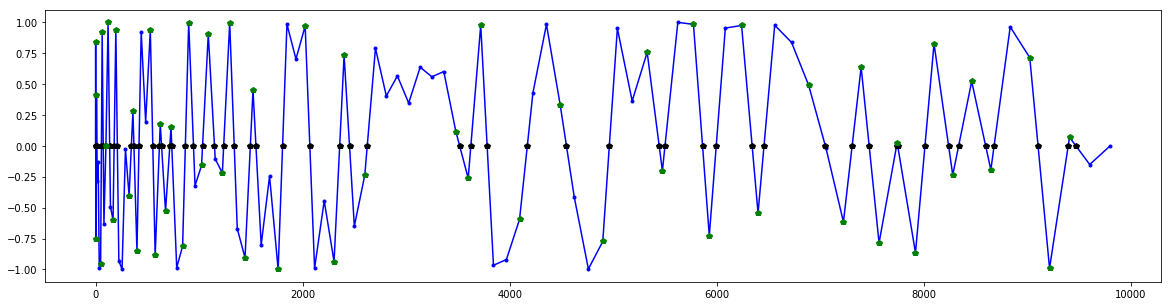

55 55


In [6]:
'''
https://pyastronomy.readthedocs.io/en/latest/pyaCDoc/mtoolsDoc/zerocross.html
'''

import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyaC

%matplotlib inline

plt.figure(figsize=(20,5))

# Generate some 'data'
x = np.arange(100.)**2
y = np.sin(x)

# Set the last data point to zero.
# It will not be counted as a zero crossing!
y[-1] = 0

# Set point to zero. This will be counted as a
# zero crossing
y[10] = 0.0

# Get coordinates and indices of zero crossings
xc, xi = pyaC.zerocross1d(x, y, getIndices=True)

# Plot the data
plt.plot(x, y, 'b.-')
# Add black points where the zero line is crossed
plt.plot(xc, np.zeros(len(xc)), 'kp')
# Add green points at data points preceding an actual
# zero crossing.
plt.plot(x[xi], y[xi], 'gp')
plt.show()

print(len(xc),len(xi))

Number of outliers:  3
Indices of outliers:  [53, 52, 51]
        R      Lambda
 1   3.14819   3.15879
 2   2.97114   3.15143
 3   3.21044   3.14389
 4   2.83814   3.13616
 5   2.84416   3.12825
 6   2.87769   3.12013
 7   2.30345   3.11180
 8   2.33534   3.10324
 9   2.12480   3.09446
10   2.09054   3.08542


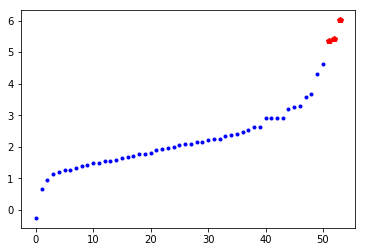

In [2]:
'''
https://pyastronomy.readthedocs.io/en/latest/pyaslDoc/aslDoc/outlier.html
'''
  
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl

# Convert data given at:
# http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm
# to array.
x = np.array([float(x) for x in "-0.25 0.68 0.94 1.15 1.20 1.26 1.26 1.34 1.38 1.43 1.49 1.49 \
          1.55 1.56 1.58 1.65 1.69 1.70 1.76 1.77 1.81 1.91 1.94 1.96 \
          1.99 2.06 2.09 2.10 2.14 2.15 2.23 2.24 2.26 2.35 2.37 2.40 \
          2.47 2.54 2.62 2.64 2.90 2.92 2.92 2.93 3.21 3.26 3.30 3.59 \
          3.68 4.30 4.64 5.34 5.42 6.01".split()])

# Apply the generalized ESD
r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)

print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
  print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.plot(x, 'b.')
# and mark the outliers.
for i in range(r[0]):
  plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()

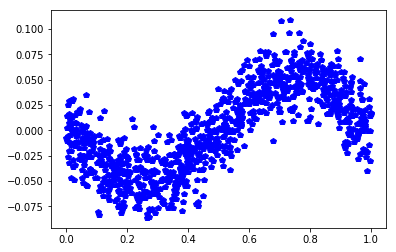

In [7]:
'''
https://pyastronomy.readthedocs.io/en/latest/pyaslDoc/aslDoc/folding.html
'''

from PyAstronomy.pyasl import foldAt
import matplotlib.pylab as plt
import numpy as np

# Generate some data ...
time = np.random.random(1000) * 100.
flux = 0.05 * np.sin(time*(2.*np.pi/21.5) + 15)
# ... and add some noise
flux += np.random.normal(0, 0.02, len(flux))

# Obtain the phases with respect to some
# reference point (in this case T0=217.4)
phases = foldAt(time, 21.5, T0=217.4)

# Sort with respect to phase
# First, get the order of indices ...
sortIndi = np.argsort(phases)
# ... and, second, rearrange the arrays.
phases = phases[sortIndi]
flux = flux[sortIndi]

# Plot the result
plt.plot(phases, flux, 'bp')
plt.show()